## Observations and Insights 

In [ ]:
Observations:
#Surprised that there was only one duplicate when cleaning the data.
#Out of the four drugs: Capomulin, Ramicane, Infubinol, Ceftamin
    #there was only one outlier-Infubinol
#Ramicane appears to be the most effective drug. That drug regimen provided the smallest tumor volume. 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Class_Materials_05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Mouse_metadata.csv" 
study_results_path = "Class_Materials_05-Matplotlib_Homework_Instructions_Pymaceuticals_data_Study_results.csv" 

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID",])
mouse_study

# Display the data table for preview
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
mice_count= len(mouse_study["Mouse ID"].value_counts())
mice_count= pd.DataFrame({"Mice Count":[mice_count]})
mice_count

,Mice Count
0,249


In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes=mouse_study.loc[mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique ()
print(dupes)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filter_df=mouse_study.loc[:, 'Mouse ID'].isin(dupes)==False
clean_study=mouse_study.loc[filter_df, :]
clean_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study['Mouse ID'].unique())

249

## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Mean
mean=mouse_study[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
#Median
median=mouse_study[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').median()['Tumor Volume (mm3)']                  
#Variance
variance=mouse_study[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').var()['Tumor Volume (mm3)']                
#std
std=mouse_study[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').std()['Tumor Volume (mm3)']                 
#sem
sem=mouse_study[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
statistics_dict={
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard_Deviation': std,
    'Standard_Error_Of_Mean': sem
}
summary_statistics=pd.DataFrame(statistics_dict)   
summary_statistics


,Mean,Median,Variance,Standard_Deviation,Standard_Error_Of_Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_dict={
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard_Deviation': std,
    'Standard_Error_Of_Mean': sem
}
summary_statistics=pd.DataFrame(statistics_dict)   
summary_statistics

# This method produces everything in a single groupby function
mouse_study.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

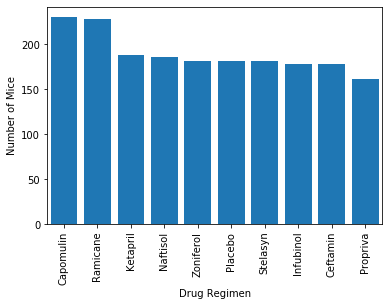

In [104]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
counts=mouse_study['Drug Regimen'].value_counts()
counts.plot(kind='bar')
plt.bar(counts.index, counts)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice')
plt.show()

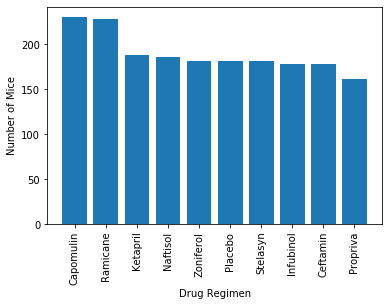

In [105]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts=mouse_study['Drug Regimen'].value_counts()

plt.bar(counts.index, counts)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice')
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

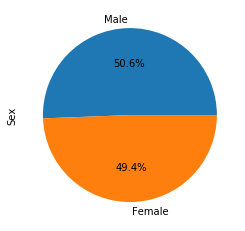

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts=mouse_study['Sex'].value_counts()
counts.plot(kind='pie', autopct='%1.1f%%')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

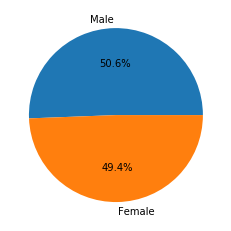

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts=mouse_study['Sex'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

cap_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Ramicane", :]
inf_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_study.loc[mouse_study["Drug Regimen"] == "Ceftamin", :]
cap_df.head()
# Start by getting the last (greatest) timepoint for each mouse
max_time=mouse_study.loc[:, ['Mouse ID', 'Timepoint']].groupby('Mouse ID').max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_study=pd.merge(max_time, mouse_study, on=["Mouse ID", 'Timepoint'], how='left')

In [100]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for each_drug in regimen: 
    filter_df=max_time_study.loc[:, 'Drug Regimen']==each_drug
    four_quantiles=[.25, .5, .75]
    one_drug_tumor_vol=max_time_study.loc[filter_df, 'Tumor Volume (mm3)']
    tumor_vol_list.append(one_drug_tumor_vol)
    quartiles=one_drug_tumor_vol.quantile(four_quantiles)

    lowerq=quartiles.loc[.25]
    upperq=quartiles.loc[.75]
    iqr=upperq-lowerq
    lower_bound=lowerq-(1.5*iqr)
    upper_bound=upperq+(1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    
    # Determine outliers using upper and lower bounds
    filter_df=(one_drug_tumor_vol>upper_bound) | (one_drug_tumor_vol<lower_bound)
    outlier_count=len(one_drug_tumor_vol.loc[filter_df])
    print(f"There are {outlier_count} outliers for {each_drug}")

There are 0 outliers for Capomulin
There are 0 outliers for Ramicane
There are 1 outliers for Infubinol
There are 0 outliers for Ceftamin


<function matplotlib.pyplot.show(*args, **kw)>

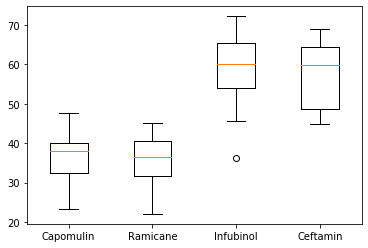

In [101]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list, labels=regimen)
plt.show

## Line and Scatter Plots

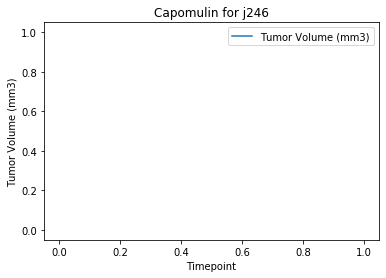

In [102]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
filter_df=mouse_study.loc[:,'Drug Regimen']=='capomulin'
capomulin=mouse_study.loc[filter_df, :]
filter_df=capomulin.loc[:, 'Mouse ID']=='j246'
a_mouse=capomulin.loc[filter_df, :]
a_mouse.plot('Timepoint','Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin for j246')
plt.show()


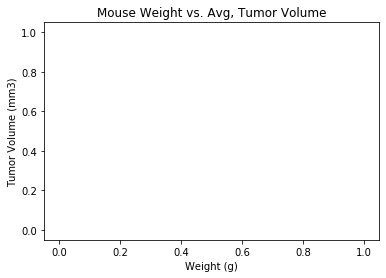

In [103]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg=capomulin[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']].groupby('Mouse ID').mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Avg, Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=sts.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0], 2)
print(f"Correlation is {corr}")

SyntaxError: invalid syntax (<ipython-input-95-ae2786f0029b>, line 3)